In [17]:
import pandas as pd
import numpy as np

In [18]:
new_df = pd.read_csv("C:/Users/amore/Desktop/vegan/data/began_group_post.csv")

In [ ]:
# new_df = pd.read_csv("C:/Users/amore/Desktop/vegan/control_ver1.csv")

## 1. [비건 시작일 기준] 비건 인증마크로 인하여 고객의 돈을 지불할 용의 확인

In [4]:
new_df

,PRD_CD,INCS_NO,STND_YMD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm,post
0,111650344,df161320881063fa0a29f3624cad69cc45d6746da0e5fa...,2018-12-06,32000.0,32000,2021-04-12,2023-04-11,0
1,111650344,df161320881063fa0a29f3624cad69cc45d6746da0e5fa...,2018-12-06,32000.0,32000,2021-04-12,2023-04-11,0
2,111650344,77cbb1df31b4da9fb17a180aea1d23136db4fe31f10870...,2018-12-06,19000.0,32000,2021-04-12,2023-04-11,0
3,111650344,14cb36a801887d044ae656d130332ca0738e7221437fff...,2018-12-06,21956.0,32000,2021-04-12,2023-04-11,0
4,111650344,73fcfb6e42003be3851d890348dfbbec6394798b9c8d2c...,2018-12-06,26006.0,32000,2021-04-12,2023-04-11,0
...,...,...,...,...,...,...,...,...
1374728,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27,1
1374729,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27,1
1374730,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27,1
1374731,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27,1


1. relative_time 추가

In [19]:
# 1. relative_time 추가
new_df['STND_YMD'] = pd.to_datetime(new_df['STND_YMD'], errors='coerce')
new_df['vgn_bgn_dttm'] = pd.to_datetime(new_df['vgn_bgn_dttm'], errors='coerce')
new_df['vgn_end_dttm'] = pd.to_datetime(new_df['vgn_end_dttm'], errors='coerce')
new_df["NET_PRD_SAL_AMT"] = new_df["NET_PRD_SAL_AMT"].apply(lambda x : np.log(x+1))

new_df["relative_time"] = new_df["STND_YMD"] - new_df["vgn_bgn_dttm"]
new_df["relative_time"] = new_df["relative_time"].dt.days
relat_df = new_df[(new_df["relative_time"] <= 30) & (new_df["relative_time"] >= -30)].reset_index(drop=True)
relat_df

# 1323258 행 삭제: -30일에서 30일 사이에 있는 경우가 아니면 다 삭제돼서 많이 줄어들었음

# 종속변수: NET_PRD_SAL_AMT (SAL_UTPR)

,PRD_CD,INCS_NO,STND_YMD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm,post,relative_time
0,110651228,3a54698e557b9b56a87bb3b5a4b9f5d16082fc72822aa7...,2021-04-06,9.259226,15000,2021-05-06,2023-05-05,0,-30
1,110651228,f61541ca5d40e0f3f9da850fd46a6999e5b962d190b1be...,2021-04-06,9.615872,15000,2021-05-06,2023-05-05,0,-30
2,110651228,99524e1195569a43d7f5b12c48c60863a3e43052558318...,2021-04-07,9.615872,15000,2021-05-06,2023-05-05,0,-29
3,110651228,8da0a3ec421c831c860e4df9757992d56e005774601f7e...,2021-04-11,9.392745,15000,2021-05-06,2023-05-05,0,-25
4,110651228,20ebae6c6d5ffb212e0c4229159e29f246a35b09377115...,2021-04-16,9.392745,15000,2021-05-06,2023-05-05,0,-20
...,...,...,...,...,...,...,...,...,...
51470,111292119,491eeb5c00b47cde8e1c9fc263c9e546d12a6762af9766...,2022-07-24,8.999125,9900,2022-06-24,2023-06-23,1,30
51471,111292119,f61a4578cfbc2caf1e1f056f5e48c570a356bf0c579697...,2022-07-24,9.050289,9900,2022-06-24,2023-06-23,1,30
51472,111292119,90d932e9d8336254e0b704acfe608cab98073917fe1070...,2022-07-24,9.050289,9900,2022-06-24,2023-06-23,1,30
51473,111292119,89867ddf7d55bdd5bea1dae66f04ec280e081f8e33513e...,2022-07-24,9.050289,9900,2022-06-24,2023-06-23,1,30


In [23]:
# 데이터프레임 예제
import pandas as pd

# 필터링 조건 설정
filtered_df = relat_df[(relat_df['post'].isin([0, 1])) & (relat_df['PRD_CD'].notnull())]

filtered_df

,PRD_CD,INCS_NO,STND_YMD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm,post,relative_time,week
0,110651228,3a54698e557b9b56a87bb3b5a4b9f5d16082fc72822aa7...,2021-04-06,9.259226,15000,2021-05-06,2023-05-05,0,-30,-5
1,110651228,f61541ca5d40e0f3f9da850fd46a6999e5b962d190b1be...,2021-04-06,9.615872,15000,2021-05-06,2023-05-05,0,-30,-5
2,110651228,99524e1195569a43d7f5b12c48c60863a3e43052558318...,2021-04-07,9.615872,15000,2021-05-06,2023-05-05,0,-29,-5
3,110651228,8da0a3ec421c831c860e4df9757992d56e005774601f7e...,2021-04-11,9.392745,15000,2021-05-06,2023-05-05,0,-25,-4
4,110651228,20ebae6c6d5ffb212e0c4229159e29f246a35b09377115...,2021-04-16,9.392745,15000,2021-05-06,2023-05-05,0,-20,-3
...,...,...,...,...,...,...,...,...,...,...
51470,111292119,491eeb5c00b47cde8e1c9fc263c9e546d12a6762af9766...,2022-07-24,8.999125,9900,2022-06-24,2023-06-23,1,30,4
51471,111292119,f61a4578cfbc2caf1e1f056f5e48c570a356bf0c579697...,2022-07-24,9.050289,9900,2022-06-24,2023-06-23,1,30,4
51472,111292119,90d932e9d8336254e0b704acfe608cab98073917fe1070...,2022-07-24,9.050289,9900,2022-06-24,2023-06-23,1,30,4
51473,111292119,89867ddf7d55bdd5bea1dae66f04ec280e081f8e33513e...,2022-07-24,9.050289,9900,2022-06-24,2023-06-23,1,30,4


In [7]:
# 비선형관계 보기 위해서 
rt = pd.get_dummies(relat_df["week"]).astype(int)
relat_df = pd.concat([relat_df, rt], axis=1)
del relat_df[0]

2. FE (제품:product단위, 날짜:date단위) 추가

In [8]:
# 상품코드별로 y_demeaned 구하기
def demean(df, column, group):
    return df[column] - df.groupby(group)[column].transform('mean')

relat_df["y_demeaned"] = demean(relat_df, "NET_PRD_SAL_AMT", "STND_YMD")
relat_df["y_demeaned"] = demean(relat_df, "y_demeaned", "PRD_CD")

3. ols

In [11]:
relat_df.columns[10:-1]

Index([-5, -4, -3, -2, -1, 1, 2, 3, 4], dtype='object')

In [13]:
import statsmodels.api as sm

clm = relat_df.columns[10:-1]

X = relat_df[clm]
y = relat_df["y_demeaned"]

X = sm.add_constant(X)

model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             y_demeaned   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     82.90
Date:                Tue, 25 Mar 2025   Prob (F-statistic):          1.19e-153
Time:                        12:18:39   Log-Likelihood:                -27727.
No. Observations:               51475   AIC:                         5.547e+04
Df Residuals:                   51465   BIC:                         5.556e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0289      0.007     -4.173      0.000      -0.042      -0.015
-5             0.0056      0.013      0.432      0.666      -0.020       0.031
-4            -0.0130      0.009     -1.420      0.156      -0.031       0.005
-3             0.0370      0.011      3.491      0.000       0.016       0.058
-2            -0.0624      0.009     -6.578      0.000      -0.081      -0.044
-1            -0.0604      0.009     -6.500      0.000      -0.079      -0.042
1              0.0457      0.009      5.307      0.000       0.029       0.063
2              0.0635      0.008      8.160      0.000       0.048       0.079
3              0.0880      0.008     10.531      0.000       0.072       0.104
4              0.0476      0.011      4.354      0.000       0.026       0.069
==============================================================================
Omnibus:                     7704.841   Durbin-Watson:                   0.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90642.581
Skew:                           0.332   Prob(JB):                         0.00
Kurtosis:                       9.467   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
X

,const,-5,-4,-3,-2,-1,1,2,3,4
0,1.0,1,0,0,0,0,0,0,0,0
1,1.0,1,0,0,0,0,0,0,0,0
2,1.0,1,0,0,0,0,0,0,0,0
3,1.0,0,1,0,0,0,0,0,0,0
4,1.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
51470,1.0,0,0,0,0,0,0,0,0,1
51471,1.0,0,0,0,0,0,0,0,0,1
51472,1.0,0,0,0,0,0,0,0,0,1
51473,1.0,0,0,0,0,0,0,0,0,1


In [15]:
y

0       -0.317945
1        0.038701
2       -0.122235
3       -0.156045
4        0.095651
           ...   
51470    0.210395
51471    0.261558
51472    0.261558
51473    0.261558
51474    0.156341
Name: y_demeaned, Length: 51475, dtype: float64

4. 그래프 그리기

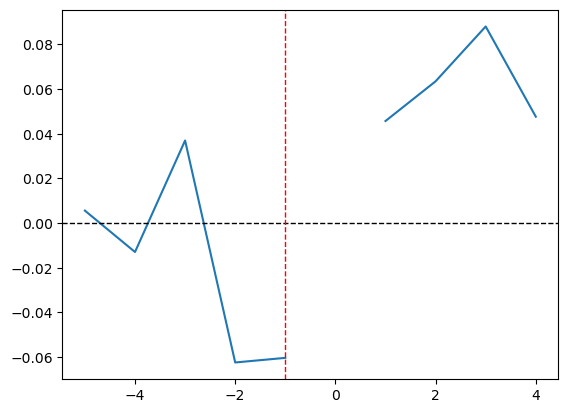

In [16]:
import matplotlib.pyplot as plt
dt = range(-5, 5)
res = list(result.params[1:])
res.insert(5, np.nan)
plt.plot(dt, res)
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
plt.axvline(x=-1, color='r', linewidth=1, linestyle='--')

# 컨트롤 그룹과 트리트먼트 그룹의 차이

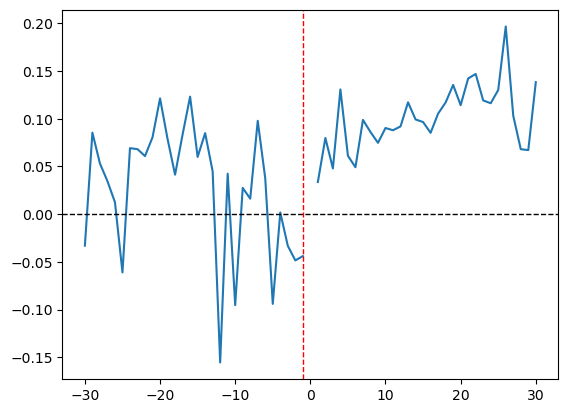

In [9]:
import matplotlib.pyplot as plt
dt = range(-30, 31)
res = list(result.params[1:])
res.insert(30, np.nan)
plt.plot(dt, res)
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
plt.axvline(x=-1, color='r', linewidth=1, linestyle='--')

# 컨트롤 그룹과 트리트먼트 그룹의 차이

5.  control 변수 추가 - 추가 필요

In [20]:
relat_df = relat_df.dropna().reset_index(drop = True)

In [21]:
import statsmodels.api as sm

# 독립 변수 (기존 변수)
clm = relat_df.columns[11:-1]  # 기존 변수

# 컨트롤 변수 열 (예: "control_1", "control_2")
control_vars = ["SEX_CD", "AGE"]  # 컨트롤 변수 이름

# 독립 변수 + 컨트롤 변수 결합
X = relat_df[clm.union(control_vars)]  # 기존 변수와 컨트롤 변수 합치기
y = relat_df["y_demeaned"]  # 종속 변수

# 상수항 추가
X = sm.add_constant(X)

# 모델 적합 및 결과 요약
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             y_demeaned   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     29.77
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:24:06   Log-Likelihood:                -26923.
No. Observations:               51004   AIC:                         5.397e+04
Df Residuals:                   50941   BIC:                         5.453e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3095      0.022    -13.946      0.0

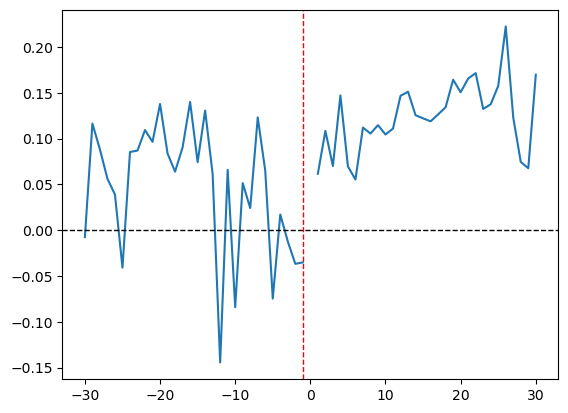

In [22]:
import matplotlib.pyplot as plt
dt = range(-30, 31)
res = list(result.params[1:-2])
res.insert(30, np.nan)
plt.plot(dt, res)
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
plt.axvline(x=-1, color='r', linewidth=1, linestyle='--')

# 컨트롤 그룹과 트리트먼트 그룹의 차이

In [ ]:
y

* 순서

1. FE (date, product)
2. relative time model
3. control 변수 추가